In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data Set**

In [ ]:
mushroom = pd.read_csv("/content/drive/MyDrive/Case Study 10/mushrooms.csv")
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**Check for Null Values**

In [ ]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#check the size of data set
mushroom.shape

(8124, 23)

In [ ]:
cor = mushroom.corr()
cor_v = cor['class'].sort_values(ascending = False)
cor_v

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

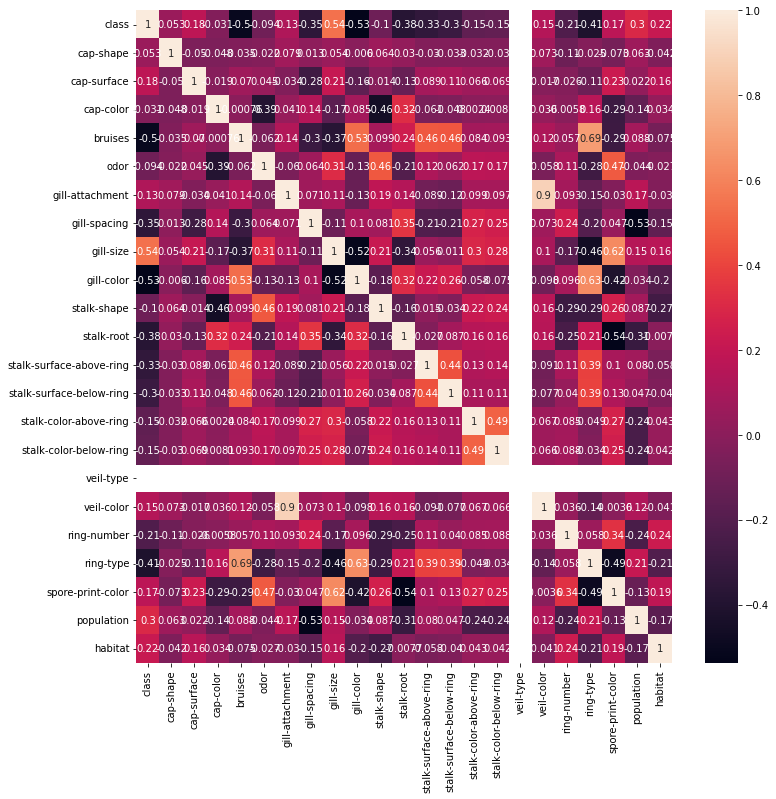

In [ ]:
plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot = True)

**Preprocessing**

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushroom = mushroom.apply(le.fit_transform)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


**Train Test Split**

In [ ]:
mushroom.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
y = mushroom['class']
x = mushroom.drop(['class'], axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

**Models**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_prediction = logistic_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_prediction))

Accuracy is: 0.9547021171836534


In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("The accuracy score using random forest classifier is ", accuracy_score(y_test,y_pred))

The accuracy score using random forest classifier is  1.0


So random forest model can be used for prediction as it is most accurate

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-0.22848474,  0.14447989, -0.19318123, ...,  1.44221131,
         0.28546005,  1.47012731],
       [-0.8502612 ,  0.14447989, -0.19318123, ..., -0.66033774,
        -2.8884598 , -0.28486597],
       [ 1.01506818,  0.95583099, -0.58540156, ..., -0.66033774,
         1.07894001, -0.86986373],
       ...,
       [ 1.01506818,  0.95583099, -0.58540156, ..., -0.66033774,
         1.07894001, -0.86986373],
       [-0.22848474,  0.95583099, -0.9776219 , ...,  1.44221131,
         0.28546005,  1.47012731],
       [-0.8502612 ,  0.95583099,  1.76792045, ..., -1.08084755,
         0.28546005,  1.47012731]])

**Gaussian Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9217134416543574

**Bernoulli naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8941408173313639

Gaussian Naive Bayes is more accurate